## Import libraries and datasets.

In [2]:
library(tidyverse)
library(readr) # Read in datasets.
options(scipen = 9999)
library(reshape2)

In [3]:
lea_color_data <- read_csv(file = "C:/Users/chris/Desktop/lea_color_data.csv",
                          show_col_types = FALSE)
CSS3_NAMES_TO_HEX <- read_csv(file = "C:/Users/chris/Desktop/CSS3_NAMES_TO_HEX.csv",
                          show_col_types = FALSE)

## Omit ubiquitous gray colors.

In [4]:
lea_color_data <- lea_color_data[,-which(names(lea_color_data) %in% c("darkslategray",
                                                                      "dimgray",
                                                                      "gray",
                                                                      "darkgray",
                                                                      "silver",
                                                                      "lightgray",
                                                                      "slategray",
                                                                      "lightslategray"))]

## Filter by color identity and sum each detected color.

In [5]:
stacked <- lea_color_data %>%
  filter(colorIdentity %in% c("W", "U", "B", "R", "G", "C")) %>%
  group_by(colorIdentity) %>%
  summarize(lightpink = sum(lightpink),darkslateblue = sum(darkslateblue),black = sum(black),
            peru = sum(peru),seagreen = sum(seagreen),olivedrab = sum(olivedrab),
            darksalmon = sum(darksalmon),lightcoral = sum(lightcoral),sandybrown = sum(sandybrown),
            khaki = sum(khaki),midnightblue = sum(midnightblue),sienna = sum(sienna),
            linen = sum(linen),darkkhaki = sum(darkkhaki),cadetblue = sum(cadetblue),
            rosybrown = sum(rosybrown),gainsboro = sum(gainsboro),steelblue = sum(steelblue),
            burlywood = sum(burlywood),wheat = sum(wheat),saddlebrown = sum(saddlebrown),
            palevioletred = sum(palevioletred),darkgoldenrod = sum(darkgoldenrod),darkseagreen = sum(darkseagreen),
            coral = sum(coral),tan = sum(tan),palegoldenrod = sum(palegoldenrod),
            goldenrod = sum(goldenrod),lightsteelblue = sum(lightsteelblue),yellowgreen = sum(yellowgreen),
            brown = sum(brown),powderblue = sum(powderblue),teal = sum(teal),
            indianred = sum(indianred),beige = sum(beige),darkolivegreen = sum(darkolivegreen),
           )

## Melt dataframe so we have columns for "color identity" and "color".

In [6]:
stacked <- melt(stacked, id = "colorIdentity")

## Create stacked bar chart showing distribution of detected colors between color identities.

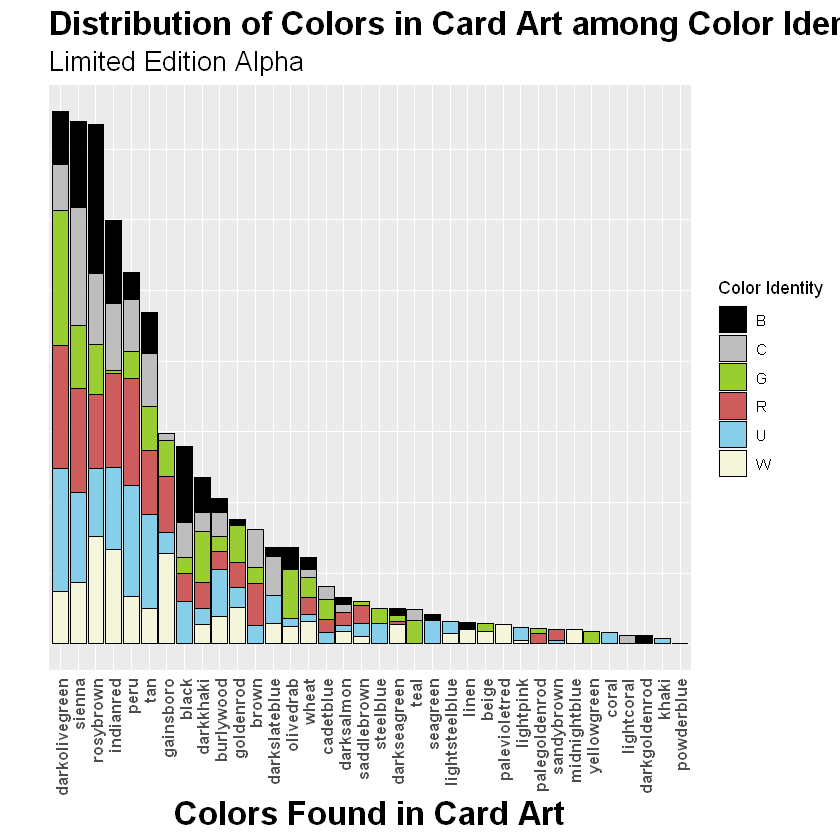

In [7]:
ggplot(stacked, aes(fill=colorIdentity, y = value, x = reorder(variable, -value))) + 
  geom_bar(position="stack", stat="identity", color="black") + 
  scale_fill_manual(values = c("black", "gray", "yellowgreen", "indianred", "skyblue", "beige")) +
  theme(axis.text.x = element_text(face="bold", vjust=0.5, hjust=1, size=10, angle=90),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_text(face="bold", size = 20),
        plot.title = element_text(face="bold", size = 20),
        plot.subtitle = element_text(size = 16)) +
  labs(title = "Distribution of Colors in Card Art among Color Identities",
       subtitle = "Limited Edition Alpha",
       x = "Colors Found in Card Art",
       y = "") + 
  guides(fill=guide_legend(title="Color Identity"))

In [8]:
ggsave("mtg-art-color-stacked-bar.png", width=15, height=10, dpi="retina")

## Filter for White cards. Drop color columns if sum = 0. Append color hex values.

In [9]:
white <- lea_color_data %>%
  filter(colorIdentity == "W")
cols_to_dropW = c(rep(TRUE, 12), colSums(white[,13:ncol(white)]) > 0)
white <- white[,cols_to_dropW]

white_sums <- data.frame(sum = colSums(white[,13:ncol(white)]))
white_sums <- cbind(color = rownames(white_sums), white_sums)
rownames(white_sums) <- 1:nrow(white_sums)
white_sums <- merge(x = white_sums, y = CSS3_NAMES_TO_HEX, by = "color", all.x = TRUE)

## Create bar chart showing breakdown of detected colors among White cards.

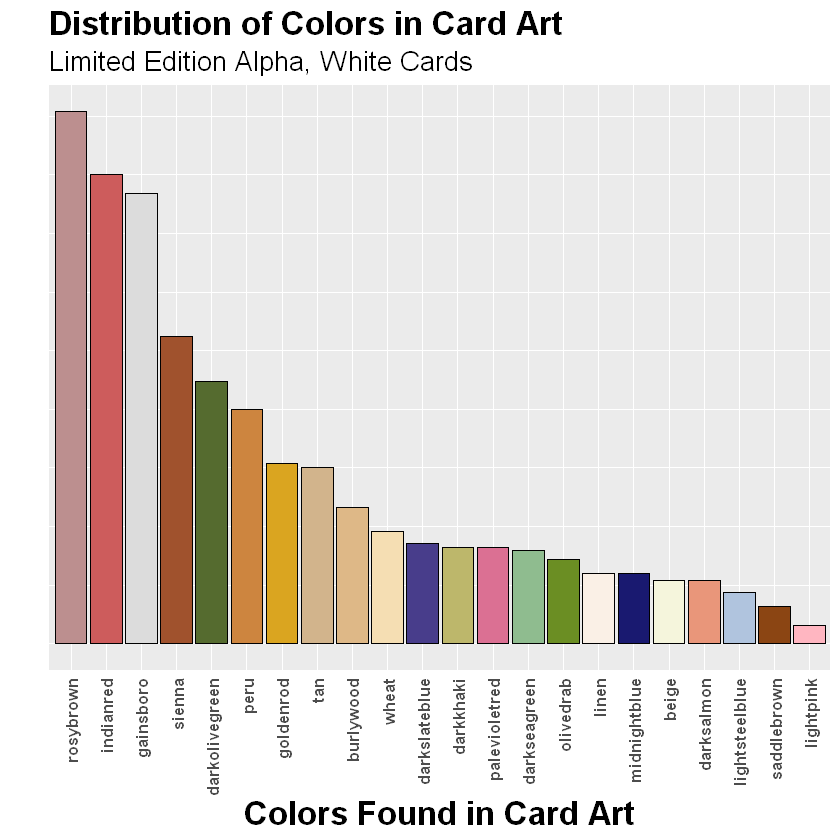

In [12]:
ggplot(white_sums, aes(x = reorder(color, -sum), y = sum)) +
  geom_bar(stat="identity", fill = white_sums$hex, color = "black") +
  theme(axis.text.x = element_text(face="bold", vjust=0.5, hjust=1, size=10, angle=90),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        axis.title = element_text(face="bold", size = 20),
        plot.title = element_text(face="bold", size = 20),
        plot.subtitle = element_text(size = 16)) +
  labs(title = "Distribution of Colors in Card Art",
       subtitle = "Limited Edition Alpha, White Cards",
       x = "Colors Found in Card Art",
       y = "")

In [13]:
ggsave("mtg-art-color-bar-graph.png", width=15, height=10, dpi="retina")